In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
lung_df = pd.read_csv('lung_cancer_prediction_dataset.csv')
pollution_df = pd.read_csv('global_air_pollution_dataset.csv')

In [31]:
lung_df.head()

,ID,Country,Population_Size,Age,Gender,Smoker,Years_of_Smoking,Cigarettes_per_Day,Passive_Smoker,Family_History,...,Air_Pollution_Exposure,Occupational_Exposure,Indoor_Pollution,Healthcare_Access,Early_Detection,Treatment_Type,Developed_or_Developing,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate
0,0,China,1400,80,Male,Yes,30,29,No,No,...,Low,Yes,No,Poor,No,NaN,Developing,690000,2.44,0.0
1,1,Iran,84,53,Male,No,0,0,Yes,No,...,Low,Yes,No,Poor,No,NaN,Developing,27000,2.10,0.0
2,2,Mexico,128,47,Male,Yes,12,6,Yes,No,...,Medium,No,No,Poor,Yes,NaN,Developing,28000,1.11,0.0
3,3,Indonesia,273,39,Female,No,0,0,No,Yes,...,Low,No,No,Poor,No,NaN,Developing,40000,0.75,0.0
4,4,South Africa,59,44,Female,No,0,0,Yes,No,...,Medium,Yes,No,Poor,No,NaN,Developing,15000,2.44,0.0


In [32]:
pollution_df.head()

,Country,City,AQI_Value,AQI_Category,CO_AQI_Value,CO_AQI_Category,Ozone_AQI_Value,Ozone_AQI_Category,NO2_AQI_Value,NO2_AQI_Category,PM2.5_AQI_Value,PM2.5_AQI_Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


## Part 3 
1. Create a Boxplot of Lung Cancer Deaths Distribution. 

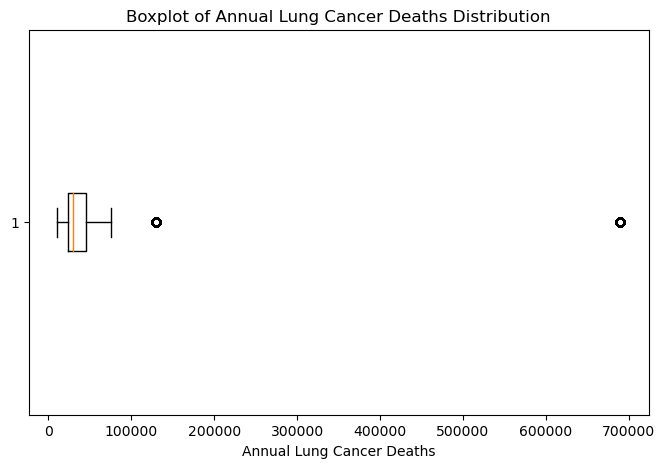

In [33]:
plt.figure(figsize=(8, 5))
plt.boxplot(lung_df['Annual_Lung_Cancer_Deaths'].dropna(), vert=False)
plt.title('Boxplot of Annual Lung Cancer Deaths Distribution')
plt.xlabel('Annual Lung Cancer Deaths')
plt.show()

In [34]:
# Removing outliers affecting the distribution 
#Calculate the upper and lower limits
Q1 = lung_df['Annual_Lung_Cancer_Deaths'].quantile(0.25)  
Q3 = lung_df['Annual_Lung_Cancer_Deaths'].quantile(0.75)  
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

upper_array = lung_df[lung_df['Annual_Lung_Cancer_Deaths'] >= upper].index
lower_array = lung_df[lung_df['Annual_Lung_Cancer_Deaths'] <= lower].index

lung_df.drop(index=upper_array, inplace=True)
lung_df.drop(index=lower_array, inplace=True)

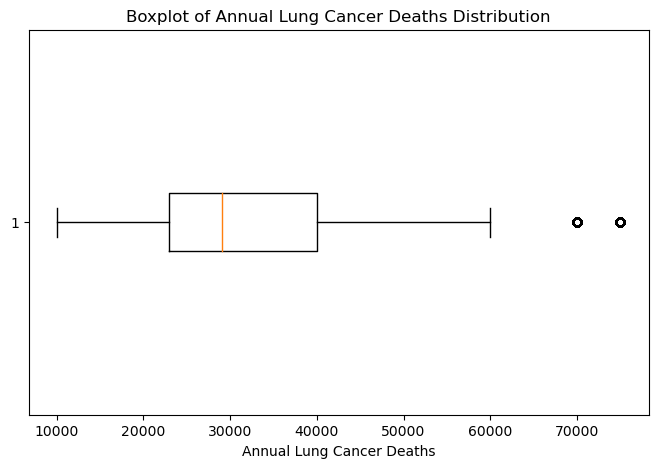

In [35]:
plt.figure(figsize=(8, 5))
plt.boxplot(lung_df['Annual_Lung_Cancer_Deaths'].dropna(), vert=False)
plt.title('Boxplot of Annual Lung Cancer Deaths Distribution')
plt.xlabel('Annual Lung Cancer Deaths')
plt.show()

2. Create a Histogram of PM2.5 AQI Values. 

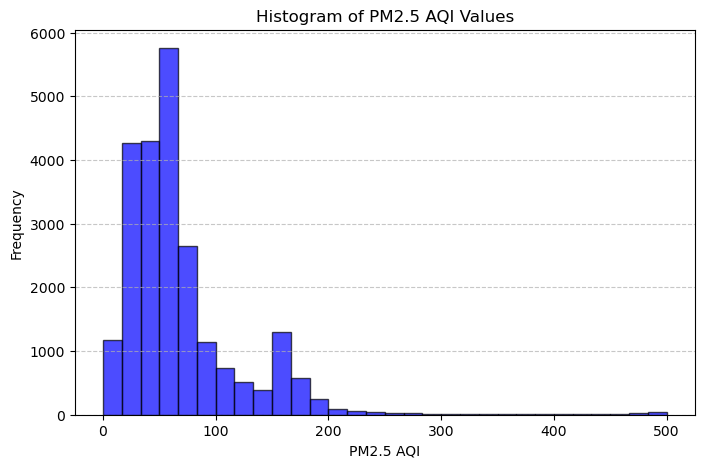

In [36]:

plt.figure(figsize=(8, 5))
plt.hist(pollution_df['PM2.5_AQI_Value'], bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of PM2.5 AQI Values')
plt.xlabel('PM2.5 AQI')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

3. Create a Density Plot of the Lung Cancer Mortality Rate. 

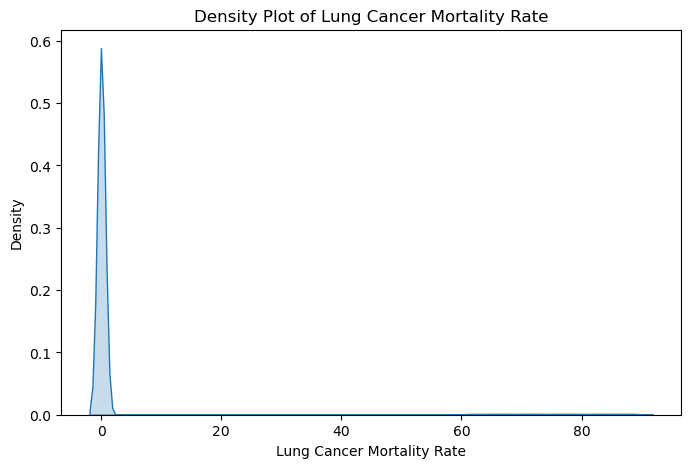

In [47]:
lung_df['Mortality_Rate'] = pd.to_numeric(lung_df['Mortality_Rate'], errors='coerce')
cleaned_mortality_rate = lung_df['Mortality_Rate'].dropna()
plt.figure(figsize=(8, 5))
sns.kdeplot(cleaned_mortality_rate, fill=True, bw_adjust=0.5)
plt.title('Density Plot of Lung Cancer Mortality Rate')
plt.xlabel('Lung Cancer Mortality Rate')
plt.ylabel('Density')
plt.show()

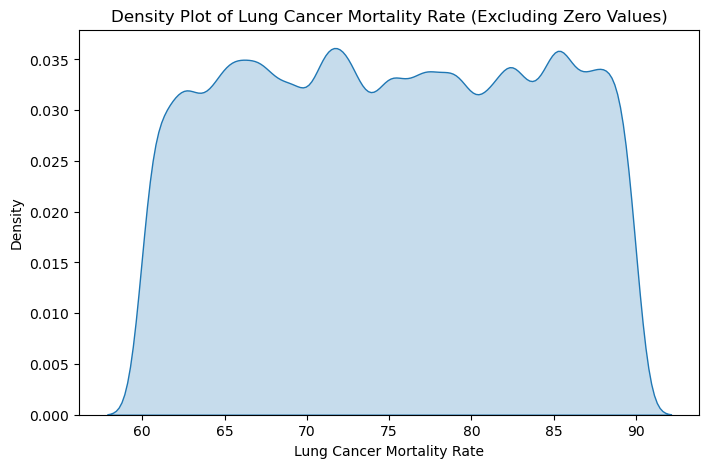

In [48]:
#removing 0 values
cleaned_mortality_rate = cleaned_mortality_rate[cleaned_mortality_rate > 0]

plt.figure(figsize=(8, 5))
sns.kdeplot(cleaned_mortality_rate, fill=True, bw_adjust=0.5)
plt.title('Density Plot of Lung Cancer Mortality Rate (Excluding Zero Values)')
plt.xlabel('Lung Cancer Mortality Rate')
plt.ylabel('Density')
plt.show()

## Part 4

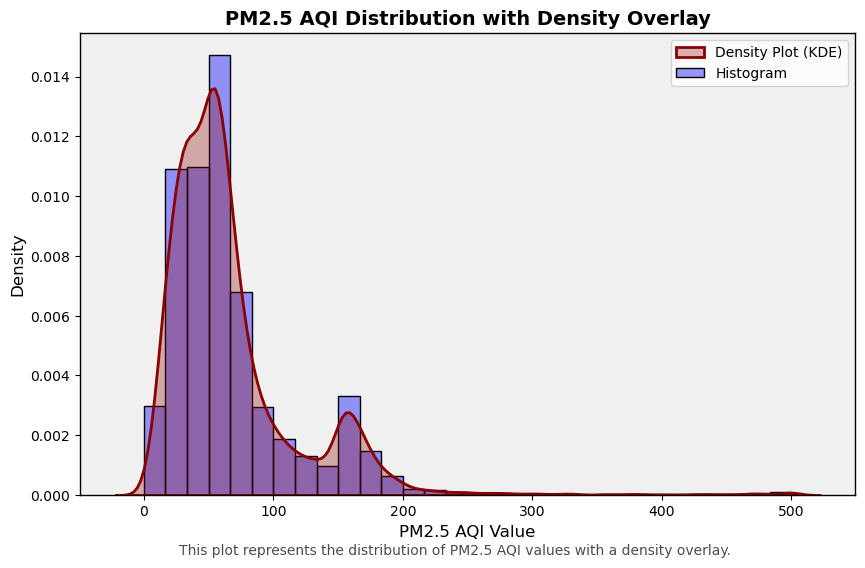

In [49]:

plt.figure(figsize=(10, 6))

sns.histplot(pollution_df['PM2.5_AQI_Value'], bins=30, color='blue', edgecolor='black', alpha=0.4, stat="density", label="Histogram")

sns.kdeplot(pollution_df['PM2.5_AQI_Value'], color='darkred', fill=True, alpha=0.3,linewidth=2, label="Density Plot (KDE)")

plt.title('PM2.5 AQI Distribution with Density Overlay', fontsize=14, fontweight='bold')
plt.xlabel('PM2.5 AQI Value', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()

plt.gca().set_facecolor("#f0f0f0")  

plt.figtext(0.5, 0.01, "This plot represents the distribution of PM2.5 AQI values with a density overlay.",
            wrap=True, horizontalalignment='center', fontsize=10, alpha=0.7)

plt.gca().spines["top"].set_linewidth(1)
plt.gca().spines["right"].set_linewidth(1)
plt.gca().spines["left"].set_linewidth(1)
plt.gca().spines["bottom"].set_linewidth(1)


plt.show()
